In [ ]:
pip install transformers

     |████████████████████████████████| 2.8 MB 4.2 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 895 kB 42.5 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 
     |████████████████████████████████| 636 kB 43.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets, models
from torch import nn
import torch.nn.functional as F

ModuleNotFoundError: ignored

In [ ]:
!pip install Pillow==5.2.0

In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

5.2.0


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [ ]:
!git clone https://github.com/jaddoescad/ants_and_bees

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [ ]:
!ls

ants_and_bees  sample_data


In [ ]:
!ls ants_and_bees/

train  val


In [ ]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [ ]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomAffine(0,shear=10, scale = ((0.8,1.2))),
                                transforms.ColorJitter(brightness=1,contrast=0.2,saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

training_dataset = datasets.ImageFolder('ants_and_bees/train',transform = transform_train )
validation_dataset = datasets.ImageFolder('ants_and_bees/val',transform = transform )

training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=20,shuffle= True)
val_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=20,shuffle= False)

In [ ]:
print (len(training_dataset))
print (len(validation_dataset))

244
153


In [ ]:
"""for inputs,labels in training_loader:
    print (inputs.shape)
    inputs = inputs.view(inputs.shape[0],-1)
    print (inputs)
    print (inputs.shape)
    break 
    """

'for inputs,labels in training_loader:\n    print (inputs.shape)\n    inputs = inputs.view(inputs.shape[0],-1)\n    print (inputs)\n    print (inputs.shape)\n    break \n    '

In [ ]:
def image_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)  # channels height width to height width channel 
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [ ]:
classes = ('ant', 'bee')

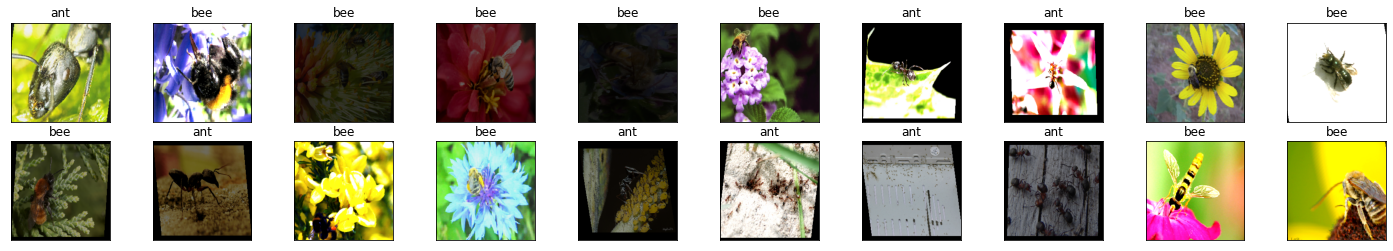

In [ ]:
dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize =(25,4))

for index in np.arange(20):
  ax = fig.add_subplot(2,10,index+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[index]))
  ax.set_title (classes[labels[index].item()])


In [ ]:
# class LeNet(nn.Module):
#   def __init__(self,):
#     super().__init__()
#     self.conv1=nn.Conv2d(3,16,3,1, padding = 1) 
#     self.conv2=nn.Conv2d(16,32,3,1,padding = 1 )
#     self.conv3=nn.Conv2d(32,64,3,1,padding = 1 )  
#     self.fc1= nn.Linear(4*4*64,500)
#     self.dropout1 = nn.Dropout(0.5)
#     self.fc2= nn.Linear(500,10)

#   def forward(self, x):
#     x = F.relu(self.conv1(x))
#     x = F.max_pool2d(x,2,2)
#     x = F.relu(self.conv2(x))
#     x = F.max_pool2d(x,2,2)
#     x = F.relu(self.conv3(x))
#     x = F.max_pool2d(x,2,2)
#     x = x.view(-1,4*4*64)
#     x = F.relu(self.fc1(x))
#     x = self.dropout1(x)
#     x = self.fc2(x)
  
#     return x


model = models.alexnet(pretrained=True)


In [ ]:
print (model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# model = LeNet().to(device)
# model

In [ ]:
#We freeze the parameters as we don't want the params in conv layers to get updated! We want them freezed
for params in model.features.parameters():
  params.requires_grad = False

In [ ]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs,len(classes))
model.classifier[6] = last_layer 

model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_his = []
val_running_correct_his = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss= 0.0
  val_correct = 0.0

  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)

    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds= torch.max(outputs,1)
    running_corrects+=torch.sum(preds == labels.data)


    running_loss+=loss.item()
  
  else:
    with torch.no_grad():
      for val_inputs,val_labels in val_loader:

        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _,val_preds= torch.max(val_outputs,1)
        val_correct+=torch.sum(val_preds == val_labels.data)
        val_running_loss+=val_loss.item()

    epoch_loss= running_loss/len(training_loader.dataset)
    epoch_accuracy= running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)

    val_epoch_loss= val_running_loss/len(val_loader.dataset)
    val_epoch_accuracy= val_correct.float()/len(val_loader.dataset) 
    val_running_loss_his.append(val_epoch_loss)
    val_running_correct_his.append(val_epoch_accuracy)

    print ('epoch:', (e+1))

    print ("Training loss: {:.4f}, acc {:.4f}".format(epoch_loss,epoch_accuracy.item()))
    print ("Validation loss: {:.4f}, acc {:.4f}".format(val_epoch_loss,val_epoch_accuracy.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 1
Training loss: 0.0320, acc 0.6639
Validation loss: 0.0200, acc 0.8301
epoch: 2
Training loss: 0.0200, acc 0.8279
Validation loss: 0.0184, acc 0.8562
epoch: 3
Training loss: 0.0166, acc 0.8279
Validation loss: 0.0185, acc 0.8562
epoch: 4
Training loss: 0.0138, acc 0.8730
Validation loss: 0.0161, acc 0.8889
epoch: 5
Training loss: 0.0105, acc 0.9385
Validation loss: 0.0175, acc 0.8954
epoch: 6
Training loss: 0.0111, acc 0.9057
Validation loss: 0.0200, acc 0.8758
epoch: 7
Training loss: 0.0101, acc 0.9057
Validation loss: 0.0201, acc 0.8824
epoch: 8
Training loss: 0.0083, acc 0.9139
Validation loss: 0.0223, acc 0.8889
epoch: 9
Training loss: 0.0074, acc 0.9303
Validation loss: 0.0216, acc 0.8889
epoch: 10
Training loss: 0.0068, acc 0.9426
Validation loss: 0.0212, acc 0.8889


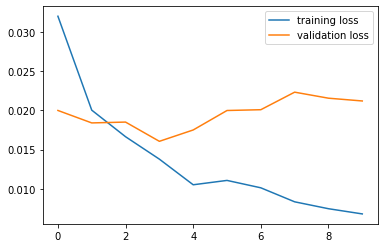

In [ ]:
# labeprint (running_loss_history)
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_his,label='validation loss')
plt.legend()

In [ ]:
running_corrects_history

[tensor(0.6639, device='cuda:0'),
 tensor(0.8279, device='cuda:0'),
 tensor(0.8279, device='cuda:0'),
 tensor(0.8730, device='cuda:0'),
 tensor(0.9385, device='cuda:0'),
 tensor(0.9057, device='cuda:0'),
 tensor(0.9057, device='cuda:0'),
 tensor(0.9139, device='cuda:0'),
 tensor(0.9303, device='cuda:0'),
 tensor(0.9426, device='cuda:0')]

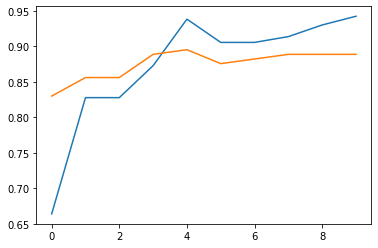

In [ ]:
plt.plot(running_corrects_history,label='training_Accuracy')
plt.plot(val_running_correct_his,label ="Validation Accuracy")

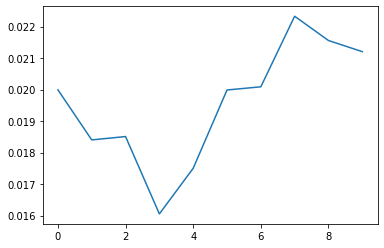

In [ ]:
plt.plot(val_running_loss_his,label='training_Accuracy')

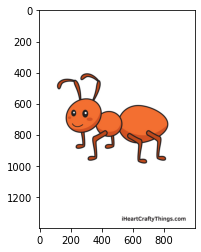

In [ ]:
import requests
from PIL import Image
url = 'https://iheartcraftythings.com/wp-content/uploads/2021/05/Ant-DRAWING-%E2%80%93-STEP-10.jpg'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

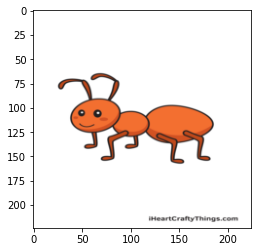

In [ ]:
img = transform(img)
plt.imshow(image_convert(img))

In [ ]:
img = img.to(device).unsqueeze(0).unsqueeze(0)
img = img[0]
outputs = model(img)
_,pred= torch.max(outputs,1)

print (classes[pred.item()])

ant


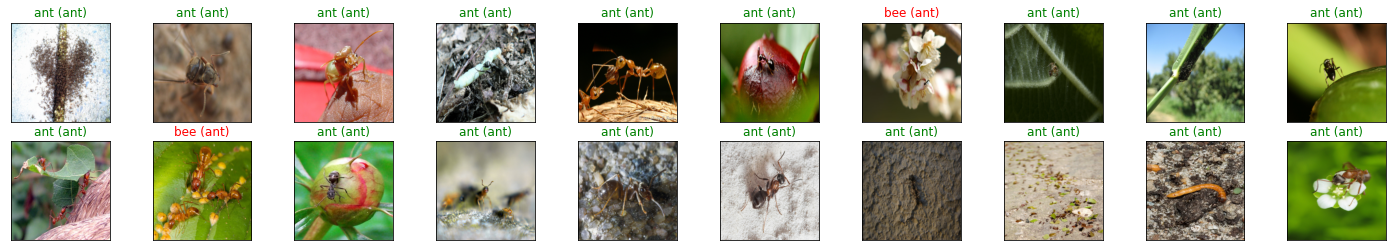

In [ ]:
dataiter = iter(val_loader)
images, label = dataiter.next()
images = images.to(device)
label = label.to(device)
output = model(images)
_,preds= torch.max(output,1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[label[idx].item()])),color=("green" if preds[idx]==label[idx] else "red"))